In [15]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Para evitar los warning
import warnings
warnings.filterwarnings(action="ignore")

#### 1 Evaluar juicios de hipótesis (2 puntos): para evaluar la pertinencia de diversas hipótesis, se te solicita discernir si es posible rechazar la hipótesis nula.

- 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era medir actitudes frente a la adopción homoparental. La organización encargada de procesar los datos obtuvo los siguientes resultados:
    - El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identificaron como homosexuales se mostraron a favor de la adopción homoparental.
    - Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.
    - Con p-valor de 0.1183 ¿es posible rechazar la hipótesis nula en favor de la alternativa con una confianza de 95%?, ¿Cuanta es la confianza máxima con la que sería posible rechazar la hipótesis nula en favor de la alternativa con estos resultados?

### Evaluación Juicios de hipótesis:
Con p valor de **0.1183**
- Hipótesis nula: Ambos porcentajes no son diferentes
- Hipótesis alternativa: Existe una diferencia substancial entre ambos.

¿Es posible rechazar la hipótesis nula en favor de la alternativa con una confianza de 95%?

> El valor p es mayor a 0.05 por lo que no se puede rechazar la hipotesis nula con una confianza del 95%  (Igual se deberia considerar el tamaño de la muestra y la posibilidad de cometer un error de tipo II.)
   
- ¿Cuanta es la confianza máxima con la que sería posible rechazar la hipótesis nula en favor de la alternativa
  con estos resultados?
  
> La confianza máxima es de 1-0.1183 es decir del 88%

#### 2. Importar la base de datos utilizada la sesión presencial anterior (2 puntos):
- Agregue una serie de variables binarias por cada continente de la variable region.
> Tip: Utilice np.where para ello.
- De manera similar a la sesión anterior, enfóquese en las siguientes variables:
    - Apellidos desde la A hasta la N: Enfocarse en las variables chldmort, adfert y life.
    - Apellidos desde la N hasta la Z: Enfocarse en las variables femlab, literacy y school.

In [16]:
variables = ['chldmort','adfert','life']+['africa','americas','asia','europe','oceania']
df = pd.read_csv("nations.csv",encoding="iso-8859-1", index_col=0)

for i in df.region.unique():
    df[str.lower(i)] = np.where(df.loc[:,"region"] == i, 1, 0)

df2 = df.loc[:,variables]

df2

,chldmort,adfert,life,africa,americas,asia,europe,oceania
1,34.75,7.300000,72.316666,1,0,0,0,0
2,122.75,111.699997,54.733334,1,0,0,0,0
3,60.25,52.099998,52.250000,1,0,0,0,0
4,170.50,124.800003,53.783333,1,0,0,0,0
5,168.50,18.600000,48.866665,1,0,0,0,0
...,...,...,...,...,...,...,...,...
190,26.75,28.299999,71.533333,0,0,0,0,1
191,36.00,70.300003,66.500000,0,0,0,0,1
192,19.25,22.299999,71.833336,0,0,0,0,1
193,36.50,23.299999,66.033333,0,0,0,0,1


#### 3. Implementar una función de prueba de hipótesis a mano (3 puntos):
- La función debe ingresar los siguientes argumentos:
    - df: La tabla de datos.
    - variable: La variable a analizar.
    - binarize: El indicador binario a utilizar.
> Tip:
> - ❖ Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con dropna().
> - ❖ Implemente ttest_ind de scipy.stats y guarde el valor t y pval.
> - ❖ Reporte las medias para cada grupo (0 y 1).
> - ❖ Reporte la diferencia de entre las medias.
> - ❖ Reporte los valores t y p

In [88]:
def hipotesis(df, variable, binarize):
    tmp = df.copy()
    df_grupo_1 = tmp[tmp[binarize] == 1][variable].dropna()
    df_grupo_0 = tmp[tmp[binarize] == 0][variable].dropna()
    
    media_grupo_1 = round(df_grupo_1.mean(),2)
    media_grupo_2 = round(df_grupo_0.mean(),2)
    t, pval = stats.ttest_ind(df_grupo_1, df_grupo_0)
    diff = round(abs(media_grupo_1-media_grupo_2),2)

    print(f"""La media de la variable {variable} del grupo {binarize} es {media_grupo_1},
la media del resto del mundo es {media_grupo_2},
su diferencia es de {diff} y los valores t y pvalue son: {round(t,4), round(pval,4)}.""")

hipotesis(df2,"life","africa")

La media de la variable life del grupo africa es 56.49,
la media del resto del mundo es 73.21,
su diferencia es de 16.72 y los valores t y pvalue son: (-15.1746, 0.0).


#### 4. Implementar una función que grafique los histogramas para ambas muestras (3 puntos)
- Genere una función que devuelva un gráfico donde visualice los dos histogramas cuando la variable es 1 y 0, respectivamente.
> Tip: Refactorize la función incluyendo el método hist de matplotlib.pyplot. Incluya los argumentos alpha y label.
- Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique. Concluya con los principales resultados al respecto.

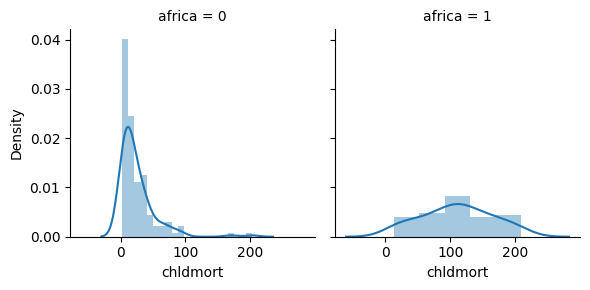

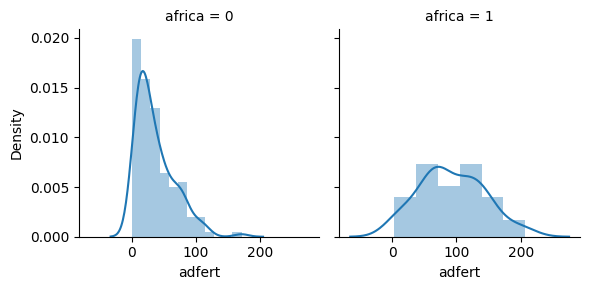

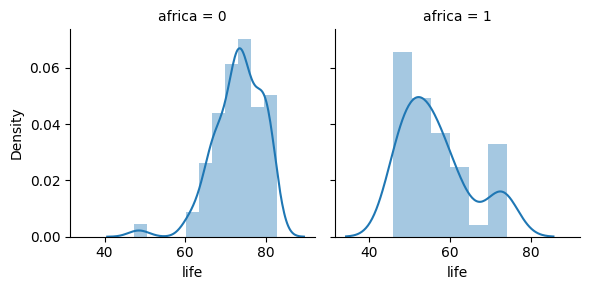

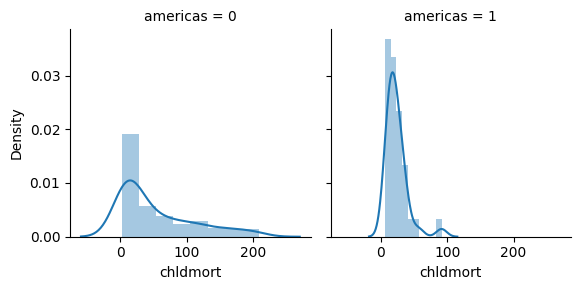

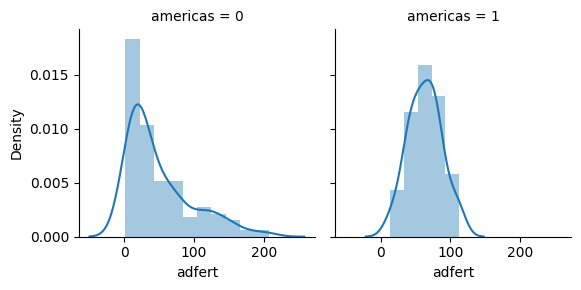

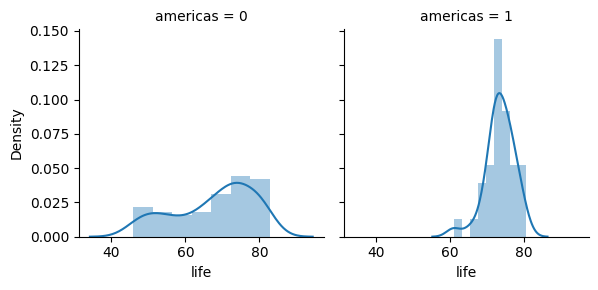

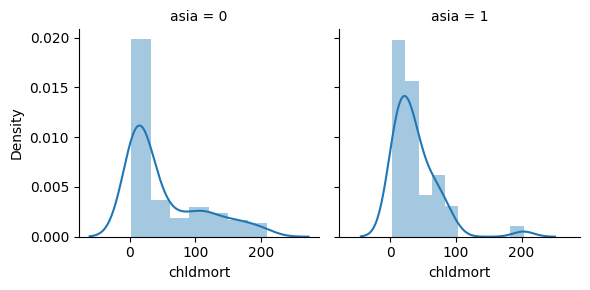

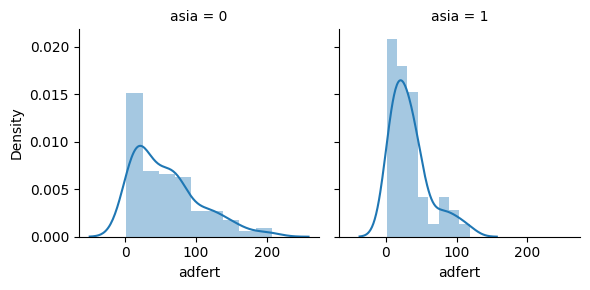

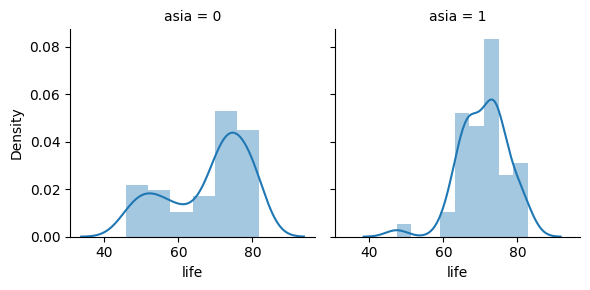

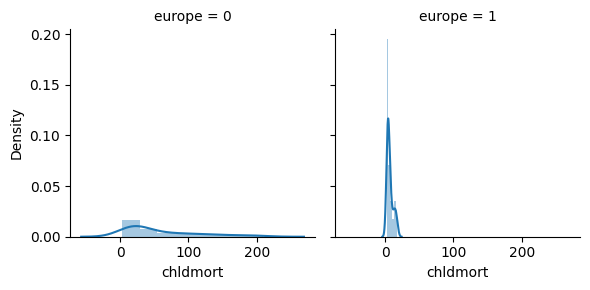

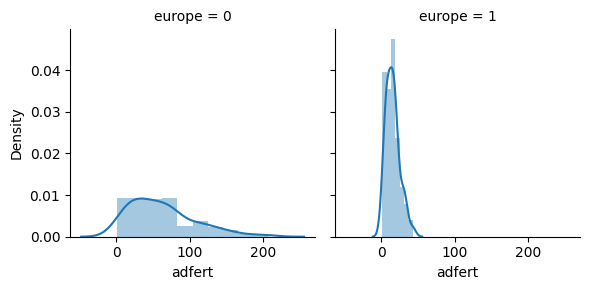

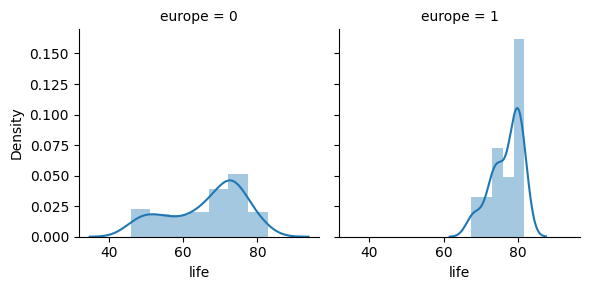

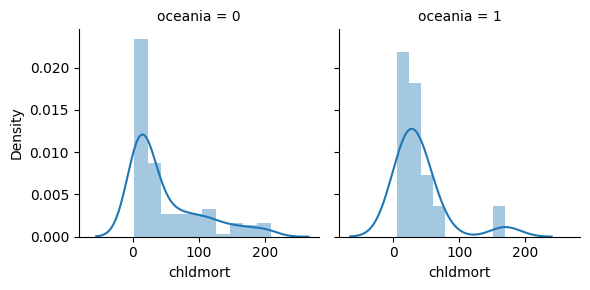

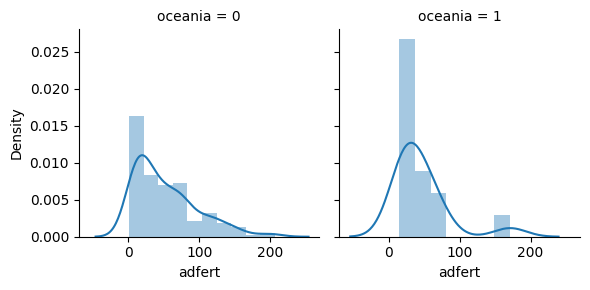

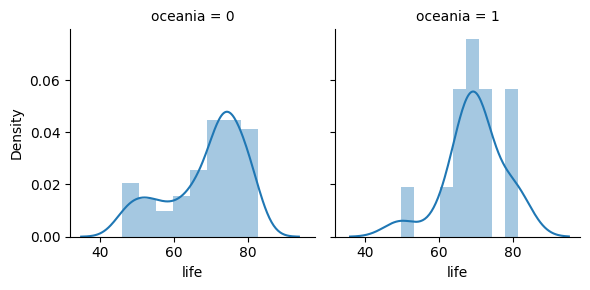

In [20]:
def graficar(df, variable, binarize):
    grid = sns.FacetGrid(df, col=binarize, col_wrap=2)
    grid.map(sns.distplot, variable) 

for i in ['africa', 'americas', 'asia', 'europe', 'oceania']:
    for j in ["chldmort", "adfert", "life"]:
        graficar(df2,j,i)

#### Refactorizando

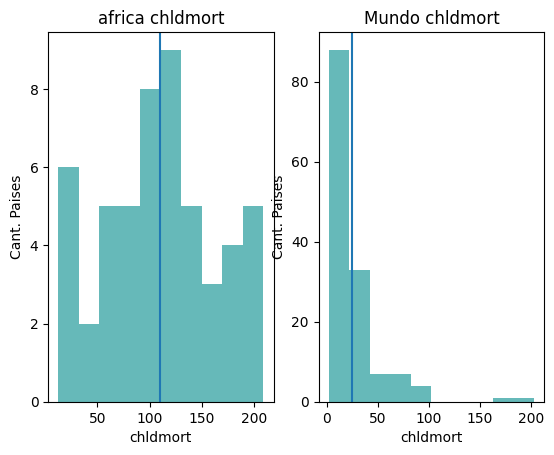

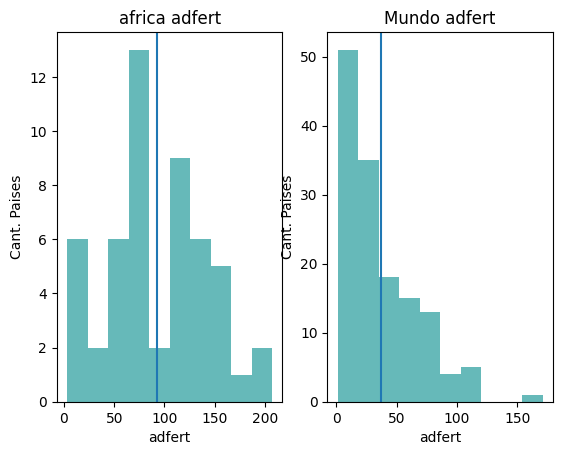

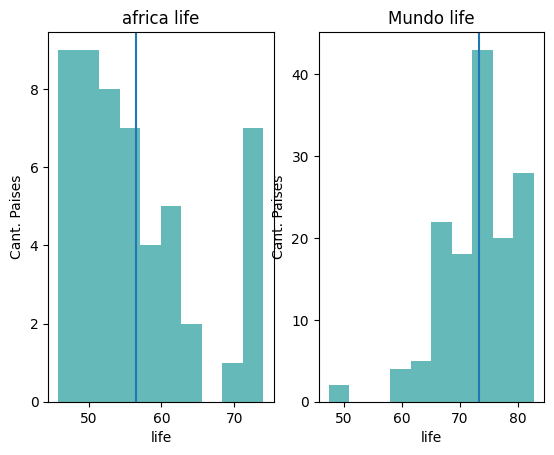

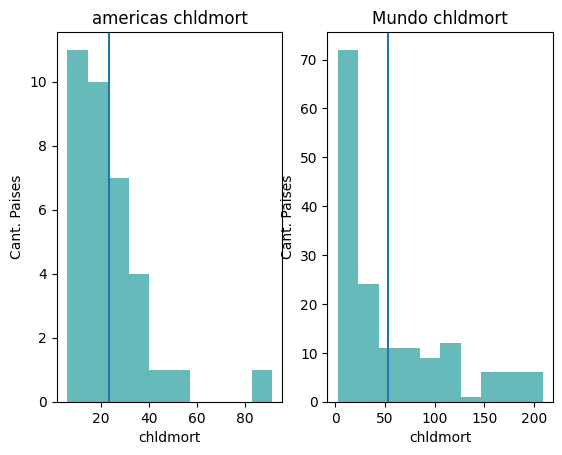

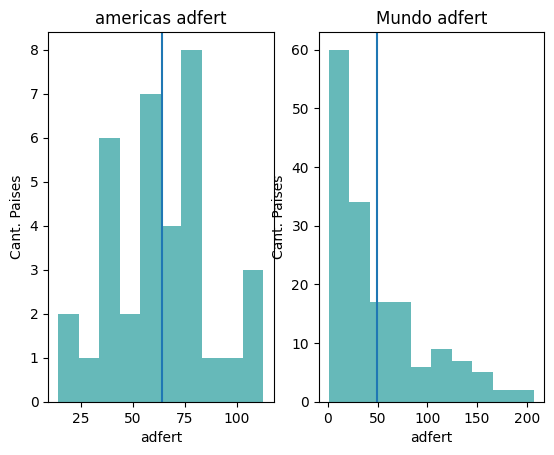

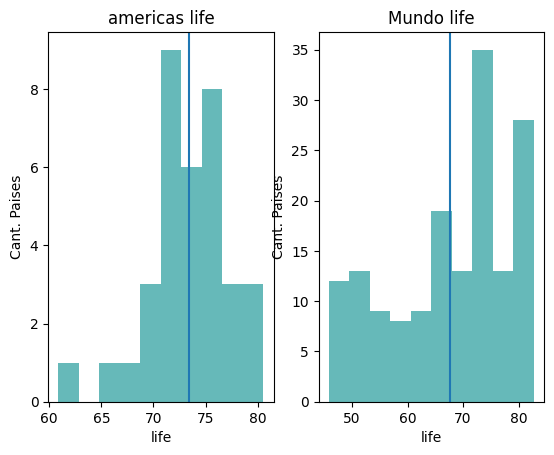

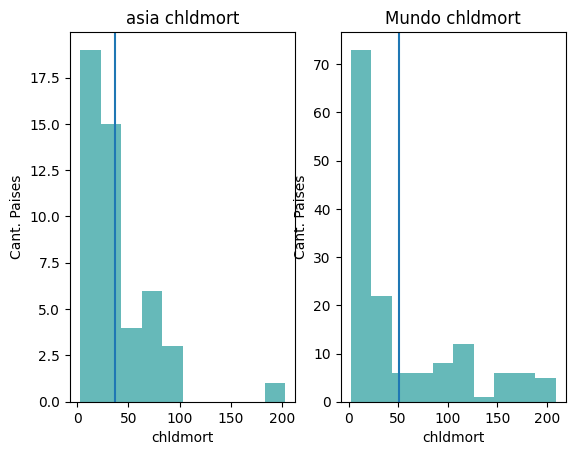

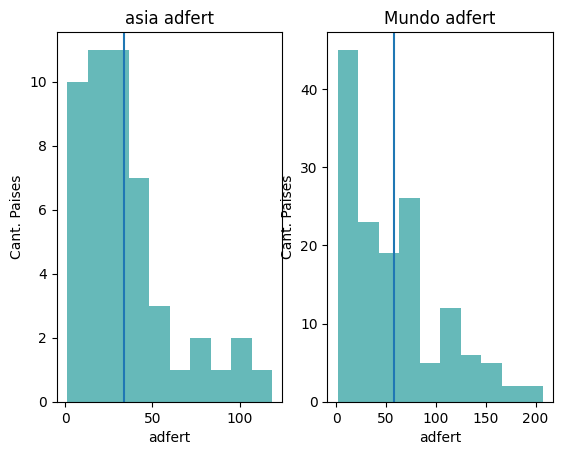

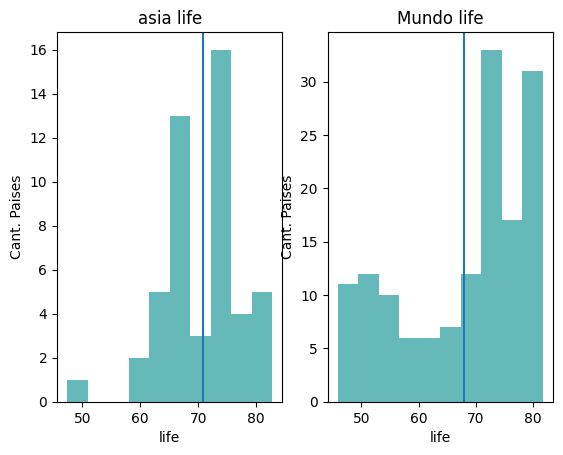

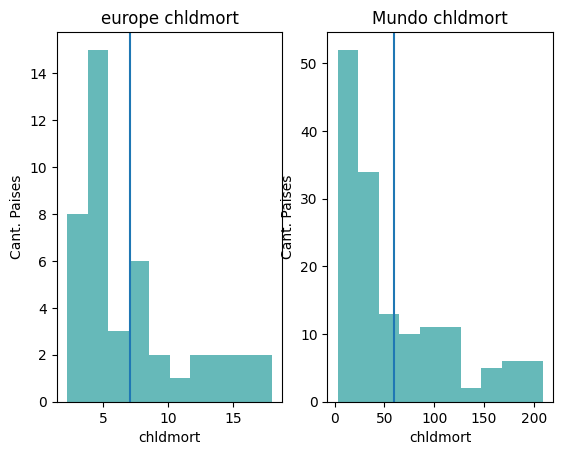

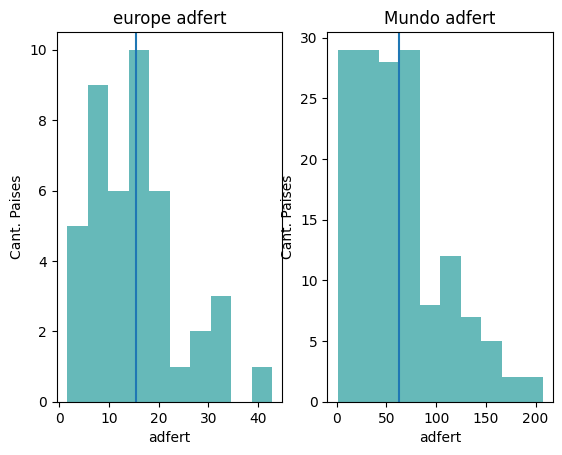

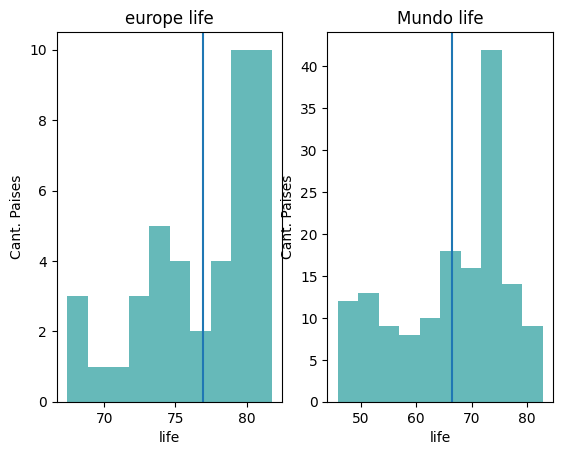

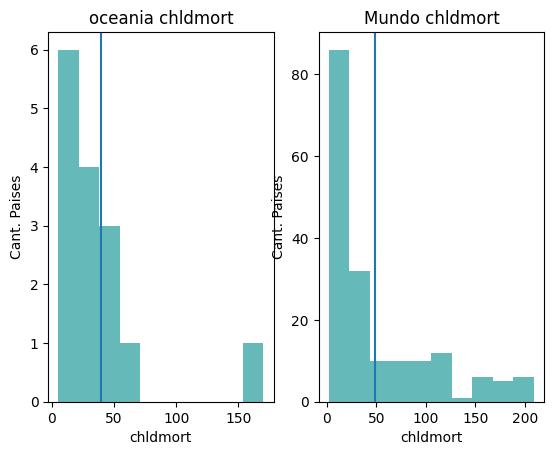

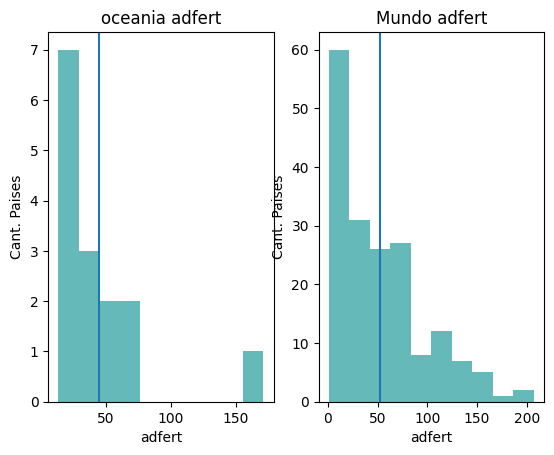

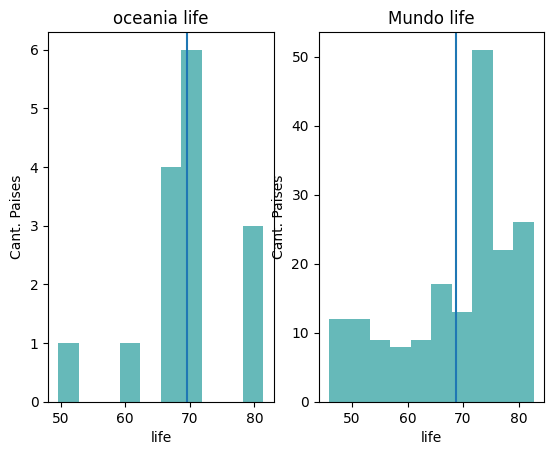

In [50]:
def graf_hist(df, variable, binarize):
      
    df_continente = df.loc[df[binarize]==1][variable].dropna()
    df_mundo = df.loc[df[binarize]==0][variable].dropna()
    
    plt.subplot(1, 2, 1)
    plt.hist(df_continente, alpha=.6, color="darkcyan")
    plt.xlabel(variable)
    plt.ylabel("Cant. Paises")
    plt.axvline(np.mean(df_continente))
    plt.title("{0} {1}".format(binarize, variable))
    
    plt.subplot(1, 2, 2)
    plt.hist(df_mundo, alpha=.6, color='darkcyan')
    plt.xlabel(variable)
    plt.ylabel("Cant. Paises")
    plt.axvline(np.mean(df_mundo))
    plt.title("Mundo {0}".format(variable))
    plt.show()

for i in ['africa', 'americas', 'asia', 'europe', 'oceania']:
    for j in ["chldmort", "adfert", "life"]:
        graf_hist(df2,j,i)

> Las diferencias mas grandes las podemos en el continente de <code>africa</code>donde el promedio de vida es mas bajo que en el resto del mundo, la mortalidad infantil tambien es bastante alta y tambien el embarazo en edad temprana.<code> America</code> tambien tiene una tasa de embarazos adolescentes mayor al promedio del resto del mundo.